In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
base_dir="/content/drive/My Drive/Colab Notebooks/CNN"

In [ ]:
train_dir=os.path.join(base_dir,'train')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

In [ ]:
validation_dir=os.path.join(base_dir,'validation')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [ ]:
test_dir=os.path.join(base_dir,'test')
test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

In [ ]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

In [ ]:
print(train_cat_fnames[:10])

['cat.3.jpg', 'cat.12.jpg', 'cat.6.jpg', 'cat.9.jpg', 'cat.10.jpg', 'cat.13.jpg', 'cat.5.jpg', 'cat.4.jpg', 'cat.1.jpg', 'cat.7.jpg']


In [ ]:
print(train_dog_fnames[:10])

['dog.2.jpg', 'dog.1.jpg', 'dog.3.jpg', 'dog.66.jpg', 'dog.4.jpg', 'dog.31.jpg', 'dog.49.jpg', 'dog.19.jpg', 'dog.6.jpg', 'dog.42.jpg']


In [ ]:
print("total training cat images={}".format(len(os.listdir(train_cats_dir))))

total training cat images=1000


In [ ]:
print("total testing cat images={}".format(len(os.listdir(test_cats_dir))))

total testing cat images=500


In [ ]:
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

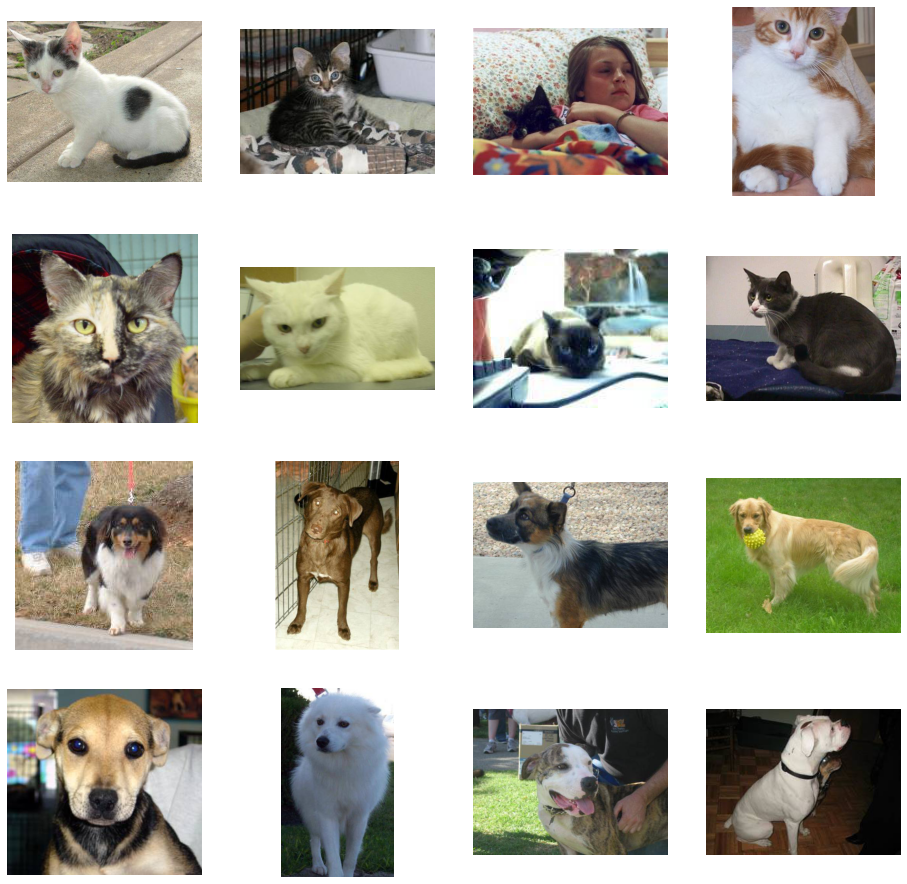

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
#we extratcted 16 features in first cnn layer and kernel size is (3,3) and image size is 150*150 with 3 channels
model=Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
tf.keras.layers.MaxPooling2D(2,2),#max pooling layer reduce size of feature frame we have now 75*75 feature layer
tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation="relu"), 
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation="relu"),  
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation="relu"),#512 neurons in hidden layer
tf.keras.layers.Dense(1,activation="sigmoid") 
])


In [ ]:
model.summary()#summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

# COMPILING THE MODEL

In [ ]:
#from tensorflow.keras.optimizer import RMSprop
#optimizers are like RMSprop ,gradient descent,SGD
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#lr is learning rate,binary cross entropy is used for classification


# DATA PREPROCESSING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescaled all images
train_datagen=ImageDataGenerator(rescale=1.0/255.)
test_datagen=ImageDataGenerator(rescale=1.0/255.)
#flow training images in batches of 20 using train_datagen generator
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode="binary",target_size=(150,150))
#flow validation images in batches of 20 using test_datagen_generator
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode="binary",target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#TRAINING

history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=100,epochs=15,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 683s - loss: 0.7021 - accuracy: 0.5140 - val_loss: 0.6830 - val_accuracy: 0.5090
Epoch 2/15
100/100 - 58s - loss: 0.6631 - accuracy: 0.6010 - val_loss: 0.6515 - val_accuracy: 0.6060
Epoch 3/15
100/100 - 58s - loss: 0.6226 - accuracy: 0.6510 - val_loss: 0.6322 - val_accuracy: 0.6690
Epoch 4/15
100/100 - 57s - loss: 0.5898 - accuracy: 0.6765 - val_loss: 0.5813 - val_accuracy: 0.6980
Epoch 5/15
100/100 - 57s - loss: 0.5256 - accuracy: 0.7345 - val_loss: 0.6325 - val_accuracy: 0.6910
Epoch 6/15
100/100 - 57s - loss: 0.4829 - accuracy: 0.7655 - val_loss: 0.6273 - val_accuracy: 0.6890
Epoch 7/15
100/100 - 56s - loss: 0.4226 - accuracy: 0.8020 - val_loss: 0.6185 - val_accuracy: 0.7190
Epoch 8/15
100/100 - 56s - loss: 0.3359 - accuracy: 0.8440 - val_loss: 0.7041 - val_accuracy: 0.7040
Epoch 9/15
100/100 - 56s - loss: 0.2531 - accuracy: 0.8875 - val_loss: 0.7165 - val_accuracy: 0.7260
Epoch 10/15
100/100 - 56s - loss: 0.1714 - accuracy: 0.9310 - val_loss: 0.9344 - val_accur

In [ ]:
#diploy model on colab:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes=model.predict(images,batch_size=10)
print(classes[0])
if classes[0]>0:
  print(fn+"is a dog")
else:
  print(fn+"is a cat")

Saving sample 2.jpg to sample 2 (1).jpg
[1.]
sample 2.jpgis a dog


In [ ]:
model.save("mycnnmodel.h5")#to save model